<a href="https://colab.research.google.com/github/gowthamp-04/Data-Analytics/blob/main/used_selling_cars_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [5]:
df = pd.read_csv("DATA.csv")
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
(df.dtypes)

,0
Column1,int64
Column2,object
Column3,object
Column4,object
Column5,object
Column6,object
Column7,object
Column8,object
Column9,object
Column10,float64


In [7]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [9]:
data=df
data.isna().any()
data.isnull().any()

,0
symboling,False
normalized-losses,False
make,False
fuel-type,False
aspiration,False
num-of-doors,False
body-style,False
drive-wheels,False
engine-location,False
wheel-base,False


In [10]:
from os import replace
df['city-mpg']=235/df['city-mpg']
df.rename(columns={'city_mpg': "city-L / 100km"},inplace=True)
print(df.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [11]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [12]:
df.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [13]:
df=df[df.price != '?']
df.price=df.price.astype(int)
df.dtypes

<ipython-input-13-1ac9e902f246>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price=df.price.astype(int)


,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [14]:
df['length'].tolist()

[168.8,
 168.8,
 171.2,
 176.6,
 176.6,
 177.3,
 192.7,
 192.7,
 192.7,
 176.8,
 176.8,
 176.8,
 176.8,
 189.0,
 189.0,
 193.8,
 197.0,
 141.1,
 155.9,
 158.8,
 157.3,
 157.3,
 157.3,
 157.3,
 157.3,
 157.3,
 157.3,
 174.6,
 173.2,
 144.6,
 144.6,
 150.0,
 150.0,
 150.0,
 163.4,
 157.1,
 167.5,
 167.5,
 175.4,
 175.4,
 175.4,
 169.1,
 170.7,
 172.6,
 199.6,
 199.6,
 191.7,
 159.1,
 159.1,
 159.1,
 166.8,
 166.8,
 169.0,
 169.0,
 169.0,
 169.0,
 177.8,
 177.8,
 177.8,
 177.8,
 177.8,
 177.8,
 175.0,
 175.0,
 190.9,
 190.9,
 187.5,
 202.6,
 202.6,
 180.3,
 208.1,
 199.2,
 178.4,
 157.3,
 157.3,
 157.3,
 157.3,
 173.0,
 173.0,
 173.2,
 173.2,
 173.2,
 172.4,
 172.4,
 172.4,
 172.4,
 165.3,
 165.3,
 165.3,
 165.3,
 170.2,
 165.3,
 165.6,
 165.3,
 170.2,
 162.4,
 173.4,
 173.4,
 181.7,
 184.6,
 184.6,
 170.7,
 170.7,
 178.5,
 186.7,
 186.7,
 198.9,
 198.9,
 186.7,
 186.7,
 198.9,
 198.9,
 186.7,
 186.7,
 186.7,
 157.3,
 157.3,
 157.3,
 167.3,
 167.3,
 174.6,
 173.2,
 168.9,
 168.9,
 168.9,


In [15]:
df['width'].tolist()

[64.1,
 64.1,
 65.5,
 66.2,
 66.4,
 66.3,
 71.4,
 71.4,
 71.4,
 64.8,
 64.8,
 64.8,
 64.8,
 66.9,
 66.9,
 67.9,
 70.9,
 60.3,
 63.6,
 63.6,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 64.6,
 66.3,
 63.9,
 63.9,
 64.0,
 64.0,
 64.0,
 64.0,
 63.9,
 65.2,
 65.2,
 65.2,
 62.5,
 65.2,
 66.0,
 61.8,
 65.2,
 69.6,
 69.6,
 70.6,
 64.2,
 64.2,
 64.2,
 64.2,
 64.2,
 65.7,
 65.7,
 65.7,
 65.7,
 66.5,
 66.5,
 66.5,
 66.5,
 66.5,
 66.5,
 66.1,
 66.1,
 70.3,
 70.3,
 70.3,
 71.7,
 71.7,
 70.5,
 71.7,
 72.0,
 68.0,
 64.4,
 64.4,
 64.4,
 63.8,
 65.4,
 65.4,
 66.3,
 66.3,
 66.3,
 65.4,
 65.4,
 65.4,
 65.4,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 65.2,
 65.2,
 66.5,
 66.5,
 66.5,
 67.9,
 67.9,
 67.9,
 68.4,
 68.4,
 68.4,
 68.4,
 68.4,
 68.4,
 68.4,
 68.4,
 68.4,
 68.4,
 68.3,
 63.8,
 63.8,
 63.8,
 63.8,
 63.8,
 64.6,
 66.3,
 68.3,
 65.0,
 65.0,
 65.0,
 66.5,
 66.6,
 66.5,
 66.5,
 66.5,
 66.5,
 66.5,
 66.5,
 63.4,
 63.6,
 63.8,
 65.4,
 65.4,
 65.4,
 65.4,
 65.4,
 65.4,

In [16]:
df['height'].tolist()

[48.8,
 48.8,
 52.4,
 54.3,
 54.3,
 53.1,
 55.7,
 55.7,
 55.9,
 54.3,
 54.3,
 54.3,
 54.3,
 55.7,
 55.7,
 53.7,
 56.3,
 53.2,
 52.0,
 52.0,
 50.8,
 50.8,
 50.8,
 50.6,
 50.6,
 50.6,
 50.6,
 59.8,
 50.2,
 50.8,
 50.8,
 52.6,
 52.6,
 52.6,
 54.5,
 58.3,
 53.3,
 53.3,
 54.1,
 54.1,
 54.1,
 51.0,
 53.5,
 51.4,
 52.8,
 52.8,
 47.8,
 54.1,
 54.1,
 54.1,
 54.1,
 54.1,
 49.6,
 49.6,
 49.6,
 49.6,
 53.7,
 55.5,
 53.7,
 55.5,
 55.5,
 55.5,
 54.4,
 54.4,
 56.5,
 58.7,
 54.9,
 56.3,
 56.5,
 50.8,
 56.7,
 55.4,
 54.8,
 50.8,
 50.8,
 50.8,
 50.8,
 49.4,
 49.4,
 50.2,
 50.2,
 50.2,
 51.6,
 51.6,
 51.6,
 51.6,
 54.5,
 54.5,
 54.5,
 54.5,
 53.5,
 54.5,
 53.3,
 54.5,
 53.5,
 53.3,
 54.7,
 54.7,
 55.1,
 56.1,
 55.1,
 49.7,
 49.7,
 49.7,
 56.7,
 56.7,
 58.7,
 58.7,
 56.7,
 56.7,
 56.7,
 58.7,
 56.7,
 56.7,
 56.0,
 50.8,
 50.8,
 50.6,
 50.8,
 50.8,
 59.8,
 50.2,
 50.2,
 51.6,
 51.6,
 51.6,
 55.2,
 50.5,
 56.1,
 56.1,
 56.1,
 56.1,
 56.1,
 56.1,
 53.7,
 53.7,
 55.7,
 52.5,
 52.5,
 52.5,
 54.3,
 54.3,
 53.0,

In [17]:
data['length'] = data['length']/data['length'].max()
data['width']= data['width']/data['width'].max()
data['height']=data['height']/data['height'].max()

In [18]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,10.217391,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,12.368421,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,13.055556,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,9.038462,27,22470


In [23]:
df.length.tolist()

[168.8,
 168.8,
 171.2,
 176.6,
 176.6,
 177.3,
 192.7,
 192.7,
 192.7,
 176.8,
 176.8,
 176.8,
 176.8,
 189.0,
 189.0,
 193.8,
 197.0,
 141.1,
 155.9,
 158.8,
 157.3,
 157.3,
 157.3,
 157.3,
 157.3,
 157.3,
 157.3,
 174.6,
 173.2,
 144.6,
 144.6,
 150.0,
 150.0,
 150.0,
 163.4,
 157.1,
 167.5,
 167.5,
 175.4,
 175.4,
 175.4,
 169.1,
 170.7,
 172.6,
 199.6,
 199.6,
 191.7,
 159.1,
 159.1,
 159.1,
 166.8,
 166.8,
 169.0,
 169.0,
 169.0,
 169.0,
 177.8,
 177.8,
 177.8,
 177.8,
 177.8,
 177.8,
 175.0,
 175.0,
 190.9,
 190.9,
 187.5,
 202.6,
 202.6,
 180.3,
 208.1,
 199.2,
 178.4,
 157.3,
 157.3,
 157.3,
 157.3,
 173.0,
 173.0,
 173.2,
 173.2,
 173.2,
 172.4,
 172.4,
 172.4,
 172.4,
 165.3,
 165.3,
 165.3,
 165.3,
 170.2,
 165.3,
 165.6,
 165.3,
 170.2,
 162.4,
 173.4,
 173.4,
 181.7,
 184.6,
 184.6,
 170.7,
 170.7,
 178.5,
 186.7,
 186.7,
 198.9,
 198.9,
 186.7,
 186.7,
 198.9,
 198.9,
 186.7,
 186.7,
 186.7,
 157.3,
 157.3,
 157.3,
 167.3,
 167.3,
 174.6,
 173.2,
 168.9,
 168.9,
 168.9,


<ipython-input-27-a5ca84ef2b15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price-binned'] = pd.cut(df['price'], bins, labels = group_names, include_lowest = True)


0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 201, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


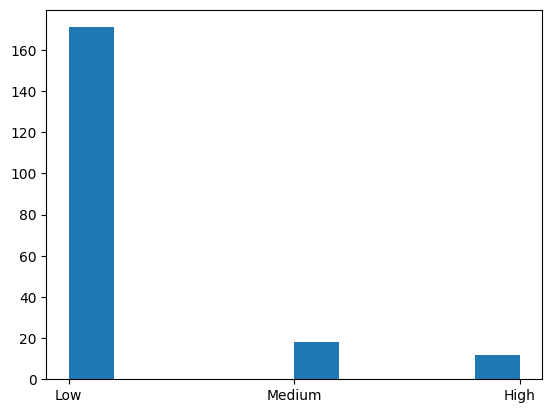

In [27]:
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins, labels = group_names, include_lowest = True)
print(df['price-binned'])
plt.hist(df['price-binned'])
plt.show()

In [29]:
pd.get_dummies(df['fuel-type']).head()
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,9.944145,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,2.534599,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


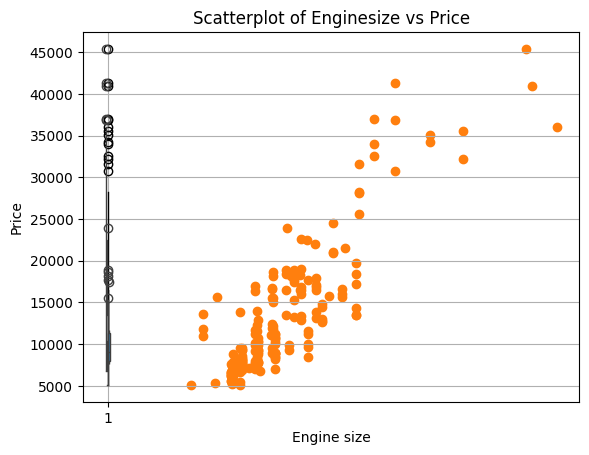

In [34]:
plt.boxplot(df['price'])
sns.boxplot(x ='drive-wheels', y ='price', data = df)
plt.scatter(df['engine-size'], df['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [36]:
test = df[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<ipython-input-37-c80bcf0e291e>:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


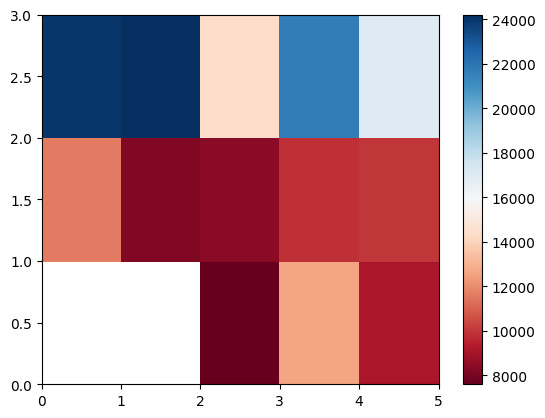

In [37]:
data_pivot = data_grp.pivot(index = 'drive-wheels',columns = 'body-style')
data_pivot

plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


<ipython-input-38-96f4990a3f23>:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  annova_results_l = sp.stats.f_oneway(grouped_annova.get_group('honda')['price'],grouped_annova.get_group('subaru')['price'])
<ipython-input-38-96f4990a3f23>:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  annova_results_l = sp.stats.f_oneway(grouped_annova.get_group('honda')['price'],grouped_annova.get_group('subaru')['price'])


(0.0, 53322.946305618425)

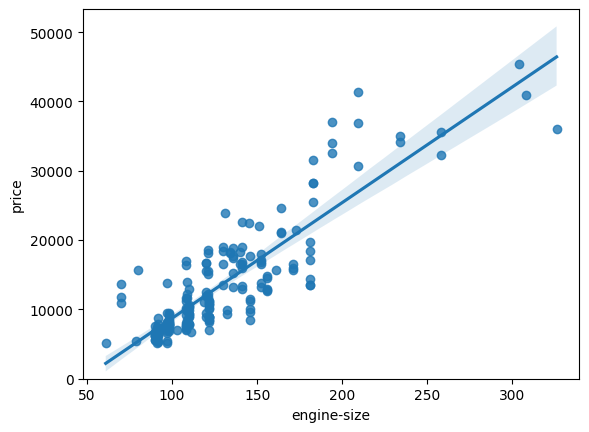

In [38]:
data_annova = df[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(grouped_annova.get_group('honda')['price'],grouped_annova.get_group('subaru')['price'])
print(annova_results_l)

sns.regplot(x ='engine-size', y ='price', data = df)
plt.ylim(0, )